### Import all the necessary modules, packages, and libraries to complete this assignment.

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from time import time
from math import sqrt
from sklearn import linear_model, model_selection, preprocessing
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import tensorflow as tf

# 1 (10pts) Linear regression with one variable from scratch 
Using Jupyter notebook, load the data (ex1data1.csv). Visualize data using scatter plot. The first column is Population of City in 10,000s, and the second column is profit of food truck in 10,000. In order to predict the profit, fit the data using gradient descent method (without matrix). You need to calculate cost function and update weight using gradient descent method. Try several different learning rate. Please print Root Mean Squared Error (RMSE) after optimization.

### Read in first dataset.

In [2]:
data = pd.read_csv('ex1data1.csv', header=None)

### Visualize the first dataset as a scatter plot.

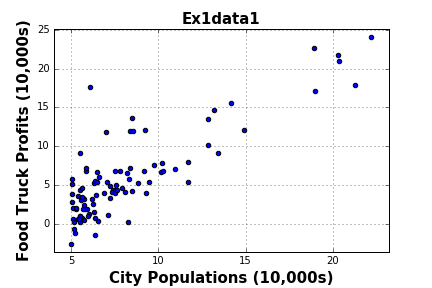

In [3]:
# Plot data as a scatter plot
formatting = {'fontsize': 15, 'weight': 'bold'}
plt.title('Ex1data1', formatting)
plt.xlabel('City Populations (10,000s)', formatting)
plt.ylabel('Food Truck Profits (10,000s)', formatting)
plt.xlim(min(data[0]) - 1, max(data[0]) + 1)
plt.ylim(min(data[1]) - 1, max(data[1]) + 1)
plt.grid(True)
plt.scatter(data[0], data[1])

### Initialize variables and define functions used for learning.

In [4]:
# Initialize learning rates, sample count, data samples, and data labels
learning_rates, m, X, Y = [0.01, 1e-3, 1e-4], len(data), data[0], data[1]

# Linear model
model = lambda x: W0 + W1*x

# Cost function
J = lambda hyp: 1/m * sum([(y_hat - y)**2 for y_hat, y in zip(hyp, Y)])

# Derivative of cost function w.r.t. W0
dJ_dW0 = lambda hyp: 2/m * sum([y_hat - y for y_hat, y in zip(hyp, Y)])

# Derivative of cost function w.r.t. W1
dJ_dW1 = lambda hyp: 2/m * sum([(y_hat - y) * x for y_hat, y, x in zip(hyp, Y, X)])

# Function for updating model parameters
def update_weights(hypothesis, alpha, W0, W1):
    W0 -= alpha*dJ_dW0(hypothesis)
    W1 -= alpha*dJ_dW1(hypothesis)
    return W0, W1

### Train a two parameter linear model on the first dataset using hand-written gradient descent method.

In [5]:
"""
The best model has:
    RMSE = 2.992542935594168
    learning rate = 0.01
    W0 = -3.8090237940980507
    W1 = 1.1843179540419724
"""

# Initialize weights and generate first hypothesis
W0_init, W1_init = 0, 0
W0, W1 = 0, 0
Y_hat = pd.Series(list(map(model, X)))

print('Initial RMSE: {:{align}{width}}'.format(
    sqrt(J(Y_hat)), 
    align='>', 
    width=50-len(str(sqrt(J(Y_hat))))))

# Train the model using different learning rates
results = []
for alpha in learning_rates:
    
    # Reinitialize weights and regenerate hypothesis
    W0, W1 = W0_init, W1_init
    Y_hat = pd.Series(list(map(model, X)))
    
    # Actually train the model
    new_cost, old_cost, start, count = -1, 0, time(), 0
    print('Performing gradient descent with a learning rate of {}'.format(alpha))

    while new_cost < old_cost and abs(old_cost - new_cost) > 1e-5:
        old_cost = J(Y_hat)
        W0, W1 = update_weights(Y_hat, alpha, W0, W1)
        Y_hat = pd.Series(list(map(model, X)))
        new_cost = J(Y_hat)
        if time() - start > 3:
            start = time()
            print('\tCost: {}'.format(float(new_cost)))
        count += 1
        
    print('Final RMSE w/ alpha={}: {:{align}{width}} achieved in {count} iterations\n'.format(
        alpha, 
        sqrt(J(Y_hat)), 
        align='>', 
        width=8-len(str(alpha))+len(str(sqrt(J(Y_hat)))),
        count=count))
    
    # Append tuple of variables pertaining to this training run to a list of results 
    results.append((sqrt(J(Y_hat)), alpha, W0, W1))
    
print('\nThe best model has:\n\tRMSE = {}\n\tlearning rate = {}\n\tW0 = {}\n\tW1 = {}'.format(*min(results)))

Initial RMSE:                 8.009086574317406
Performing gradient descent with a learning rate of 0.01
Final RMSE w/ alpha=0.01:     2.992542935594168 achieved in 1059 iterations

Performing gradient descent with a learning rate of 0.001
Final RMSE w/ alpha=0.001:    2.99462855630495 achieved in 7399 iterations

Performing gradient descent with a learning rate of 0.0001
	Cost: 10.166946570513268
	Cost: 9.505579722378611
	Cost: 9.298177076086311
	Cost: 9.171826083697145
Final RMSE w/ alpha=0.0001:   3.015397147851498 achieved in 42058 iterations


The best model has:
	RMSE = 2.992542935594168
	learning rate = 0.01
	W0 = -3.8090237940980507
	W1 = 1.1843179540419724


### Visualize first dataset again with the model that has been fit to it.

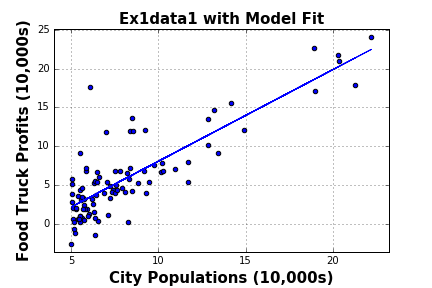

In [6]:
# Plot data as a scatter plot with the linear model fit to this data
plt.title('Ex1data1 with Model Fit', formatting)
plt.xlabel('City Populations (10,000s)', formatting)
plt.ylabel('Food Truck Profits (10,000s)', formatting)
plt.xlim(min(data[0]) - 1, max(data[0]) + 1)
plt.ylim(min(data[1]) - 1, max(data[1]) + 1)
plt.grid(True)
plt.scatter(data[0], data[1])

W0, W1 = min(results)[-2:]
model = lambda x: W0 + W1*x
Y_hat = pd.Series(list(map(model, X)))
plt.plot(data[0], Y_hat)

# 2 (30pts) Linear regression with multiple variables from scratch
Using Jupyter notebook, load the data (ex1data2.csv). Visualize data. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. In order to predict the housing price, fit the data using gradient descent method (without matrix). You need to calculate cost function and update weight using gradient descent method. Try several different learning rate. Please print the Root Mean Squared Error (RMSE) after optimization.

### Read in second dataset.

In [7]:
data = pd.read_csv('ex1data2.csv', header=None)

### Visualize the second dataset as a 3D scatter plot.

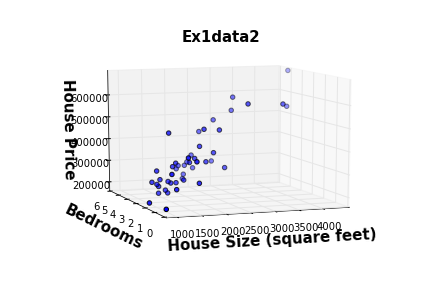

In [9]:
# Plot data as a scatter plot
formatting = {'fontsize': 15, 'weight': 'bold'}
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Ex1data2', formatting)
ax.set_xlabel('House Size (square feet)', formatting)
ax.set_ylabel('Bedrooms', formatting)
ax.set_zlabel('House Price', formatting)
ax.set_xlim(min(data[0]) - 1, max(data[0]) + 1)
ax.set_ylim(min(data[1]) - 1, max(data[1]) + 1)
ax.set_zlim(min(data[2]) - 1, max(data[2]) + 1)
ax.grid(True)
ax.scatter(data[0], data[1], data[2])
ax.view_init(10, 250)

### Initialize variables and define functions used for learning.

In [ ]:
# Initialize learning rates, sample count, data samples, and data labels
learning_rates, m, X, Y, Z = [0.01, 1e-3, 1e-4] , len(data), data[0], data[1], data[2]

# Min-max scale input
X = preprocessing.minmax_scale(X)
Y = preprocessing.minmax_scale(Y)

# Linear model
model = lambda x, y: W0 + W1*x + W2*y

# Cost function
J = lambda hyp: 1/m * sum([(z_hat - z)**2 for z_hat, z in zip(hyp, Z)])

# Derivative of cost function w.r.t. W0
dJ_dW0 = lambda hyp: 2/m * sum([z_hat - z for z_hat, z in zip(hyp, Z)])

# Derivative of cost function w.r.t. W1
dJ_dW1 = lambda hyp: 2/m * sum([(z_hat - z) * x for z_hat, z, x in zip(hyp, Z, X)])

# Derivative of cost function w.r.t. W2
dJ_dW2 = lambda hyp: 2/m * sum([(z_hat - z) * y for z_hat, z, y in zip(hyp, Z, Y)])

# Function for updating model parameters
def update_weights(hypothesis, alpha, W0, W1, W2):
    W0 -= alpha*dJ_dW0(hypothesis)
    W1 -= alpha*dJ_dW1(hypothesis)
    W2 -= alpha*dJ_dW2(hypothesis)
    return W0, W1, W2

### Train a three parameter linear model on the second dataset using hand-written gradient descent method.

In [ ]:
"""
The best model has:
    RMSE = 63926.214926312074
    learning rate = 0.01
    W0 = 199467.02647556202
    W1 = 504777.15803839586
    W2 = -34950.79328724869
"""

# Initialize weights and generate first hypothesis
W0_init, W1_init, W2_init = 0, 0, 0
W0, W1, W2 = W0_init, W1_init, W2_init

Z_hat = pd.Series(list(map(model, X, Y)))

print('Initial RMSE: {:{align}{width}}'.format(
    sqrt(J(Z_hat)), 
    align='>', 
    width=56-len(str(sqrt(J(Z_hat))))))

# Train the model using different learning rates
results = []
for alpha in [0.01, 1e-3]:
    
    # Reinitialize weights and regenerate hypothesis
    W0, W1, W2 = W0_init, W1_init, W2_init
    Z_hat = pd.Series(list(map(model, X, Y)))
    
    # Actually train the model
    new_cost, old_cost, start, count = J(Z_hat), float('inf'), time(), 0
    print('Performing gradient descent with a learning rate of {}'.format(alpha))
    
    while new_cost < old_cost and abs(old_cost - new_cost) > 1e-5:
        old_cost = J(Z_hat)
        W0, W1, W2 = update_weights(Z_hat, alpha, W0, W1, W2)
        Z_hat = pd.Series(list(map(model, X, Y)))
        new_cost = J(Z_hat)
        if time() - start > 3:
            start = time()
            print('\tCost: {}'.format(float(new_cost)))
        count += 1
        
    print('\n\tFinal RMSE: {:{align}{width}} achieved in {count} iterations\n'.format( 
        sqrt(J(Z_hat)), 
        align='>', 
        width=8-len(str(alpha))+len(str(sqrt(J(Z_hat)))),
        count=count))
    
    # Append tuple of variables pertaining to this training run to a list of results 
    results.append((sqrt(J(Z_hat)), alpha, W0, W1, W2))
    
print('\nThe best model has:\n\tRMSE = {}\n\tlearning rate = {}\n\tW0 = {}\n\tW1 = {}\n\tW2 = {}'.format(*min(results)))

### Visualize second dataset again with the model that has been fit to it (see note below).

In [ ]:
### NOTE: I had to execute this cell a couple of times in order to get the figure to display properly

# Enable embedded interactive figures
%matplotlib notebook

# Plot data as a scatter plot with the linear model fit to this data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Ex1data2 with Model Fit', formatting)
ax.set_xlabel('House Size (square feet)', formatting)
ax.set_ylabel('Bedrooms', formatting)
ax.set_zlabel('House Price', formatting)
ax.set_xlim(min(data[0]) - 1, max(data[0]) + 1)
ax.set_ylim(min(data[1]) - 1, max(data[1]) + 1)
ax.set_zlim(min(data[2]) - 1, max(data[2]) + 1)
ax.grid(True)
ax.scatter(data[0], data[1], data[2])

W0, W1, W2 = min(results)[-3:]
model = lambda x, y: W0 + W1*x + W2*y
Z_hat = pd.Series(list(map(model, X, Y)))
X_grid, Y_grid = np.meshgrid(data[0], data[1])
ax.plot_surface(X_grid, Y_grid, Z_hat.values.reshape(-1, len(Z_hat)), 
                cmap=plt.cm.cool, rstride=1, cstride=1, linewidth=0)
ax.view_init(10, 255)

# 2-1 Linear regression with multiple variables using matrix
Fit the data (ex1data2.csv) using matrix calculation. You need to calculate cost function and update weight. Please print the Root Mean Squared Error (RMSE) after optimization.

### Train a three parameter linear model on the second dataset using matrix form of gradient descent.

In [ ]:
"""
The best model has:
    RMSE = 438256.0494456521
    learning rate = 0.01
    W = 199467.04656177355
        504777.2005826939
        -34950.854535530394
"""

# Read in second dataset as a min-max scaled matrix
X = np.stack([
        pd.Series([1 for _ in range(len(data))]),
        preprocessing.minmax_scale(data[0]),
        preprocessing.minmax_scale(data[1])],
        axis=1)
y = np.asmatrix(data.iloc[:, -1]).reshape(len(data), -1)

# Initialize weights and learning rate
W_init = np.asmatrix(np.array([0., 0., 0.]).reshape(3, -1))
W = np.copy(W_init)

# Define cost, cost derivative, and weight updating functions
J = lambda: np.dot((np.dot(X, W) - y).T, np.dot(X, W) - y)
dJ_dW = lambda: (1/len(data)) * (np.dot(np.dot(X.T, X), W) - np.dot(X.T, y))

def update_weights(W, alpha):
    W -= alpha*dJ_dW()
    return W

print('Initial RMSE: {}'.format(sqrt(float(J()))))

# Train the model using different learning rates
results = []
for alpha in learning_rates:
    
    # Reinitialize weights and regenerate hypothesis
    W = np.copy(W_init)
    print('Performing gradient descent with a learning rate of {}'.format(alpha))

    # Actually train the model
    new_cost, old_cost, start, count = J(), float('inf'), time(), 0
    while new_cost < old_cost and abs(old_cost - new_cost) > 1e-5:
        old_cost = float(new_cost)
        W = update_weights(W, alpha)
        new_cost = float(J())
        if time() - start > 3:
            print('\tCost: {}'.format(new_cost))
            start = time()
        count += 1
            
    print('\n\tFinal RMSE: {:{align}{width}} achieved after {count} iterations\n'.format( 
        sqrt(J()), 
        align='>', 
        width=8-len(str(alpha))+len(str(sqrt(J()))),
        count=count))
    
    # Append tuple of variables pertaining to this training run to a list of results 
    results.append((sqrt(J()), alpha, W))

print('\nThe best model has:\n\tRMSE = {}\n\tlearning rate = {}\n\tW = {}'.format(min(results)[0], min(results)[1], '\n\t    '.join([str(float(r)) for r in min(results)[2]])))    

# 2-2 Linear regression with multiple variables using Normal equation
Fit the data (ex1data2.csv) using Normal equation. You need to calculate cost function and update weight. Please print the best Root Mean Squared Error (RMSE) after optimization.

### Solve for the three parameters of a linear model of the second dataset using the Normal equation.

In [ ]:
"""
RMSE = 438256.04944473004
W = 199467.31126290312
    504777.7612421374
    -34951.66168074836
"""

# Read in second dataset
X = np.asmatrix(np.stack([
        pd.Series([1 for _ in range(len(data))]),
        preprocessing.minmax_scale(data[0]),
        preprocessing.minmax_scale(data[1])],
        axis=1))
y = np.asmatrix(data.iloc[:, -1]).reshape(len(data), -1)

# Compute parameter vector using the normal equation
A = np.dot(np.dot(np.dot(X.T, X).I, X.T), y)
E = y - np.dot(X, A)
rmse = float(np.sqrt(np.dot(E.T, E)))
print('RMSE = {}\nW = {}'.format(rmse, '\n    '.join([str(float(r)) for r in A])))    

# 3 (60pts) Linear regression with multiple variables
Using Jupyter notebook, load the data (ex1data3.csv). This is California housing dataset. The original database is available from http://lib.stat.cmu.edu. The data contains 20,640 observations on 9 variables. This dataset contains the average house value as target variable and the following input variables (features): average income, housing average age, average rooms, average bedrooms, population, average occupation, latitude, and longitude.

# 3-1 Linear regression with multiple variables using matrix
Fit the data (ex1data3.csv) using matrix calculation. You need to calculate cost function and update weight. Please print the Root Mean Squared Error (RMSE) after optimization.

### Read in third dataset.

In [ ]:
data = pd.read_csv('ex1data3.csv', index_col=0)

### Train a nine parameter linear model on the third dataset using matrix form of gradient descent.

In [ ]:
"""
The best model has:
    RMSE = 104.03008757498613
    learning rate = 1.1
    W = 3.743158769515447
        6.300005573554144
        0.4817273134848255
        -14.554537991668859
        21.08448921010648
        -0.13939758478558373
        -4.693374070245511
        -3.977838664139507
        -4.374726862636584
"""

# Scale input and add column of 1s for bias
data_matrix = data.as_matrix(columns=data.columns[:-1])
X = np.asmatrix(np.stack([
        pd.Series([1 for _ in range(len(data))])] +
        [preprocessing.minmax_scale(c) for c in data_matrix.T],
        axis=1))
y = np.asmatrix(data.iloc[:, -1]).reshape(len(data), -1)

# Initialize weights and learning rate; define cost, cost derivative, and weight updating functions 
W_init = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.,]).reshape(9, -1))
W = np.copy(W_init)

print('Initial RMSE: {}'.format(sqrt(float(J()))))

# Train the model using different learning rates
results = []
for alpha in [1.1, 1, 0.9]:

    # Reinitialize weights and regenerate hypothesis
    W = np.copy(W_init)
    print('Performing gradient descent with a learning rate of {}'.format(alpha))
    
    # Actually train the model
    new_cost, old_cost, start, count = J(), float('inf'), time(), 0
    while new_cost < old_cost and abs(old_cost - new_cost) > 1e-5:
        old_cost = float(new_cost)
        W = update_weights(W, alpha)
        new_cost = float(J())
        if time() - start > 3:
            print('\tCost: {}'.format(new_cost))
            start = time()
        count += 1

    print('\n\tFinal RMSE: {:{align}{width}} achieved in {count} iterations\n'.format( 
        sqrt(J()), 
        align='>', 
        width=8-len(str(alpha))+len(str(sqrt(J()))),
        count=count))
    
    # Append tuple of variables pertaining to this training run to a list of results 
    results.append((sqrt(J()), alpha, W))
    
print('\nThe best model has:\n\tRMSE = {}\n\tlearning rate = {}\n\tW = {}'.format(min(results)[0], min(results)[1], '\n\t    '.join([str(float(r)) for r in min(results)[2]])))

# 3-2 Linear regression with multiple variables using Normal equation
Fit the data (ex1data3.csv) using Normal equation. You need to calculate cost function and update weight. Please print the best Root Mean Squared Error (RMSE) after optimization.

### Solve for the nine parameters of a linear model of the third dataset using the Normal equation.

In [ ]:
"""
RMSE = 104.0287708033252
W = -36.94192020501217
    0.43669329313947347
    0.009435778033647648
    -0.10732204139597243
    0.6450656935355646
    -3.9763894200357455e-06
    -0.0037865426550375055
    -0.4213143775044826
    -0.4345137546496847
"""

# Read in third dataset
X = np.asmatrix(pd.concat([
        pd.Series([1 for _ in range(len(data))]),
        data.iloc[:,:-1]],
        axis=1))
y = np.asmatrix(data.iloc[:, -1]).reshape(len(data), -1)

# Compute parameter vector using the normal equation
A = np.dot(np.dot(np.dot(X.T, X).I, X.T), y)
E = y - np.dot(X, A)
rmse = float(np.sqrt(np.dot(E.T, E)))
print('RMSE = {}\nW = {}'.format(rmse, '\n    '.join([str(float(r)) for r in A])))

# 3-3 Linear regression with multiple variables using scikit-learn linear regression model
Fit the data (ex1data3.csv) using linear regression from scikit-learn library. You need to calculate cost function and update weight. Please print the best Root Mean Squared Error (RMSE) after optimization.

### Fit scikit-learn's LinearRegression model to the third dataset.

In [ ]:
"""
RMSE: 0.1510883358410674
Intercept: 0.7209011985953243
Parameters:
    1.33003796426
    0.10042274589
    -3.54812550664
    5.41918337218
    -0.000565705359492
    -0.845372904001
    -0.81319750181
    -0.898635226232
"""

# Split third dataset into training/testing
X, y = data.iloc[:,:-1], data.iloc[:, -1]
X = preprocessing.minmax_scale(X)
y = preprocessing.minmax_scale(y)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

# Fit linear regression model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# RMSE and model coefficients
print("RMSE: {}\nIntercept: {}\nParameters:\n\t{}".format(
        sqrt(np.mean((model.predict(X_test) - y_test)**2)),
        model.intercept_,
        '\n\t'.join([str(c) for c in model.coef_])))

# 3-4 Linear regression with multiple variables using TensorFlow
Fit the data (ex1data3.csv) using linear regression using TensorFlow. Please do not use Normal equation TensorFlow. You need to calculate cost function and update weight. Please print the best Root Mean Squared Error (RMSE) after optimization.

### Fit a TensorFlow linear model to the third dataset.

In [ ]:
""" 
Epochs: 100
RMSE: 0.7517409920692444
W: 5.27824259
   0.42344368
   0.55639106
   2.4778235 
   -0.13599038
   -1.12633598
   -3.46945238
   -3.73285103
b: 3.31386828
   3.31386828  
   3.31386828  
   3.31386828  
   3.31386828  
   3.31386828
   3.31386828  
   3.31386828
"""

some_stuff = data.as_matrix(columns=data.columns[:-1])
data_matrix = np.asmatrix(np.stack(
        [preprocessing.minmax_scale(c) for c in some_stuff.T],
        axis=1))
labels = np.asmatrix(data.iloc[:, -1]).reshape(len(data), 1)

W = tf.Variable(tf.zeros([data_matrix.shape[1], 1]), name='weights')
b = tf.Variable(tf.zeros([1, data_matrix.shape[1]]), name='bias')

X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

Y_predicted = b + tf.matmul(X, W)

loss = tf.reduce_mean(tf.square(Y_predicted - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
epochs = 500

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(epochs):
        for x, y in zip(data_matrix, labels):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        c = sess.run(loss, feed_dict={X: data_matrix, Y: labels})
        print('Epoch: {:03d}    cost= {:.9f}'.format(i+1, c))
            
    w_val, b_val = sess.run([W, b])
    rmse = sess.run(tf.sqrt(loss), feed_dict={X: data_matrix, Y: labels})
    
print("RMSE: {}\nW: {}\nb: {}".format(rmse, w_val, b_val))